**learnwithbhawana**



## Multithreading Exercises with Solution
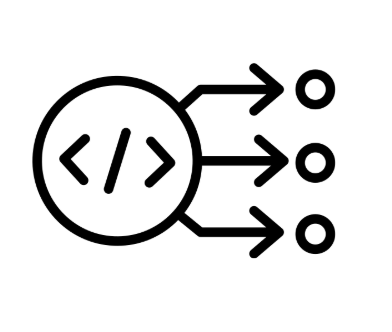


### 🔹Basic Level

#### Question 1: Run Two Functions Concurrently
Write a Python program using multithreading to print numbers from 1 to 5 and alphabets from A
to E simultaneously.

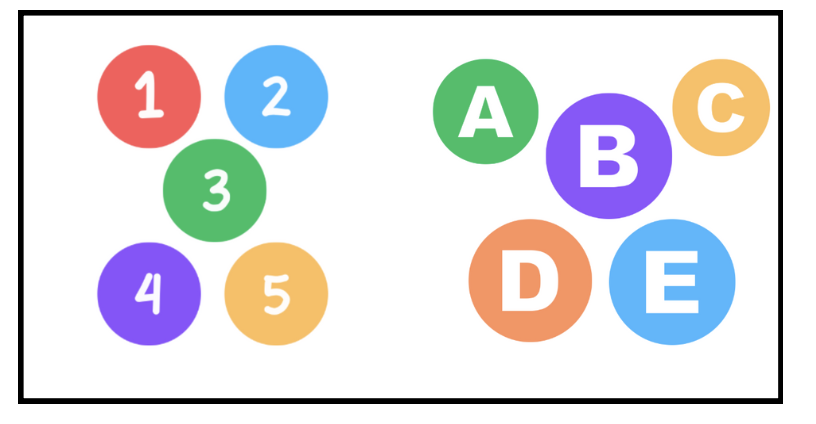

In [1]:
import threading
import time

def print_numbers():
    for i in range(1, 6):
        print(f"Number: {i}")
        time.sleep(0.5)

def print_letters():
    for letter in ['A','B','C','D','E']:
        print(f"Letter: {letter}")
        time.sleep(0.5)
        
t1 = threading.Thread(target=print_numbers)
t2 = threading.Thread(target=print_letters)

t1.start()
t2.start()

t1.join()
t2.join()


print("Both tasks completed.")

Number: 1
Letter: A
Number: 2
Letter: B
Number: 3
Letter: C
Number: 4
Letter: D
Number: 5
Letter: E
Both tasks completed.


Concept:
Basic thread creation using the threading module to achieve concurrent execution.

Explanation:
Both threads run independently and concurrently, allowing numbers and letters to print in
interleaved order.


### 🔹 Intermediate Level

#### Question2: Thread Synchronization
Create two threads that increment a shared counter 1,000 times each. Ensure data consistency
using thread locks.

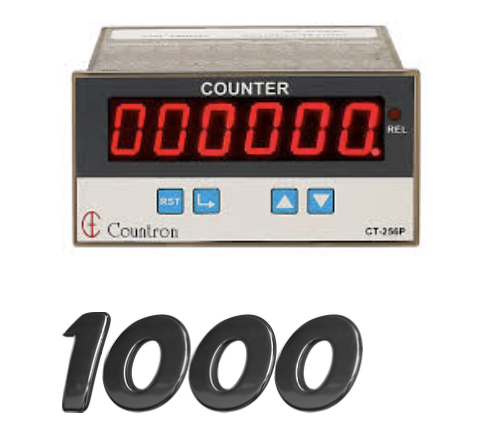


In [5]:
import threading

counter = 0
lock = threading.Lock()

def increment():
    global counter
    for _ in range(1000):
        with lock:
            counter += 1
            
t1 = threading.Thread(target=increment)
t2 = threading.Thread(target=increment)

t1.start()
t2.start()

t1.join()
t2.join()

print(f"Final Counter Value: {counter}")

Final Counter Value: 2000


Concept:
Use of Locks (threading.Lock) to prevent race conditions in multithreaded programs.

Explanation:
Without the lock, threads might update the counter incorrectly due to simultaneous access
(race condition).

#### Question 3:  Multi- Threaded Timer Simulation

Create multiple countdown timers using threads.

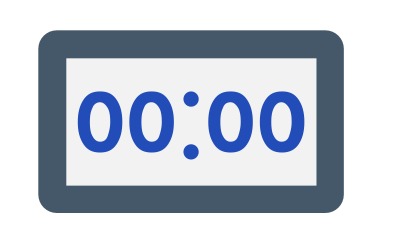

In [8]:
import threading
import time

def countdown(seconds):
    while seconds > 0:
        print(f"{seconds} seconds remaining.")
        time.sleep(1)
        seconds -= 1
    print("Timer finished!!")
    
timers = [5,10]
threads = [ ]

for t in timers:
    thread = threading.Thread(target = countdown,args = (t,))
    threads.append(thread)
    thread.start()
            
for thread in threads:
    thread.join()
    
print("Task completed!!")

5 seconds remaining.
10 seconds remaining.
4 seconds remaining.
9 seconds remaining.
3 seconds remaining.
8 seconds remaining.
2 seconds remaining.
7 seconds remaining.
1 seconds remaining.
6 seconds remaining.
Timer finished!!
5 seconds remaining.
4 seconds remaining.
3 seconds remaining.
2 seconds remaining.
1 seconds remaining.
Timer finished!!
Task completed!!


Explanation: Multiple countdown timers run simultaneously using threads.

### 🔹 Advanced Level
#### Question 4 : File Reader with Threads
Problem: Read multiple files concurrently using threads.

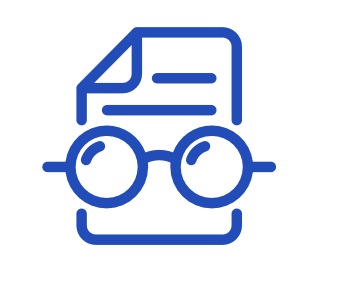

In [7]:
import threading
import time

def read_lines(filename):
    with open(filename,"r") as file:
        lines = file.readlines()
        print(f"Length of file {filename}: {len(lines)} lines.")
      
files = ['file1.txt','file2.txt','file3.txt']
threads = []

for file in files:
    thread = threading.Thread(target = read_lines,args = (file,))
    threads.append(thread)
    thread.start()
    
for thread in threads:
    thread.join()
    
print("Task completed!!")

Length of file file2.txt: 4 lines.
Length of file file3.txt: 3 lines.
Length of file file1.txt: 5 lines.
Task completed!!


Explanation: Each thread reads a separate file concurrently, speeding up the process.
    
    
#### Question 5: Thread Pool and Task Queues
Use ThreadPoolExecutor to download multiple files (simulate with sleep) concurrently.

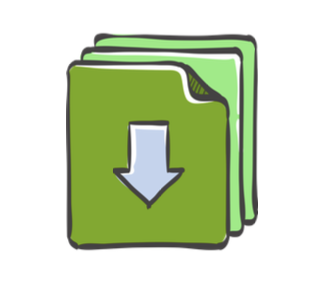

In [9]:
from concurrent.futures import ThreadPoolExecutor
import time

def download_file(file_id):
    print(f"Downloading file {file_id}...")
    time.sleep(2) # Simulating download time
    print(f"File {file_id} downloaded.")
    return f"File {file_id} complete"

files = [1, 2, 3, 4, 5]
with ThreadPoolExecutor(max_workers=3) as executor:
    results = executor.map(download_file, files)
    
for result in results:
    print(result)

File 1 downloaded.
File 2 downloaded.
File 3 downloaded.
File 4 downloaded.
File 5 downloaded.
File 1 complete
File 2 complete
File 3 complete
File 4 complete
File 5 complete


Concept:
Thread Pooling using ThreadPoolExecutor for efficient thread management.
max_workers=3: Only 3 threads will run in parallel at a time.
executor.map(): It automatically assigns each file to a thread from the pool.
Explanation:
This approach manages threads automatically and is scalable for I/O-bound operations like downloads or
API calls.


### 🔹 Pro Advanced Level
#### Question 6 : Bank Transaction Simulation
Simulate a shared bank account with concurrent withdrawals using locks.
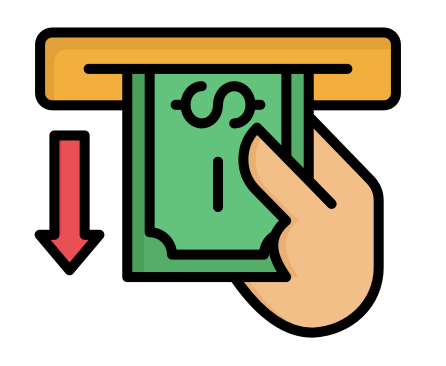

In [11]:
import threading
import time

balance = 1000
lock = threading.Lock()

def withdraw(amount):
    global balance
    with lock:
        print(f"Checking for withdrawal.")
        if balance >= amount:
            print(f"Withdrawing amount: {amount}")
            time.sleep(1)
            balance -= amount
            print(f"Balance left: {balance}")
        else:
            print(f"Insufficient Balance.")
            
t1 = threading.Thread(target = withdraw, args = (300,))
t2 = threading.Thread(target = withdraw, args = (400,))
t3 = threading.Thread(target = withdraw, args = (400,))

t1.start()
t2.start()
t3.start()
      
t1.join()
t2.join()
t3.join()
      
print("Bank transaction completed!!")

Checking for withdrawal.
Withdrawing amount: 300
Balance left: 700
Checking for withdrawal.
Withdrawing amount: 400
Balance left: 300
Checking for withdrawal.
Insufficient Balance.
Bank transaction completed!!


Explanation: Locks ensure safe balance updates and prevent race conditions.
    
### Question 7 : Web Scraper with ThreadPool
Scrape multiple websites concurrently using ThreadPoolExecutor.

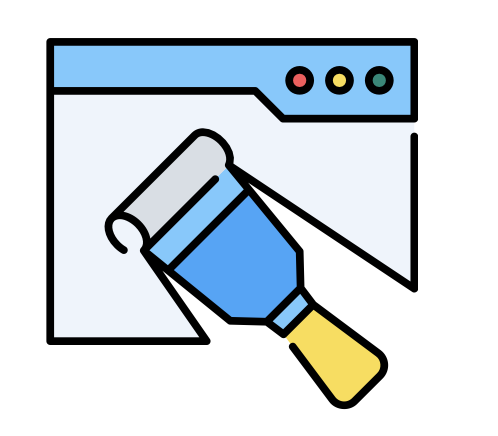

In [12]:
from concurrent.futures import ThreadPoolExecutor
import requests
import time

def fetch_url(url):
    response = requests.get(url)
    time.sleep(0.5)
    text = f"URL:{url} fetched with {len(response.content)} bytes. "
    return text

urls = ["https://docs.python.org/3/library/threading.html","https://www.python.org/",
        "https://www.github.com","https://docs.python.org/3/library/concurrent.futures.html"]

with ThreadPoolExecutor(max_workers=3) as executor:
    results = executor.map(fetch_url,urls)

for result in results:
    print(result)

URL:https://docs.python.org/3/library/threading.html fetched with 160498 bytes. 
URL:https://www.python.org/ fetched with 49737 bytes. 
URL:https://www.github.com fetched with 287070 bytes. 
URL:https://docs.python.org/3/library/concurrent.futures.html fetched with 91689 bytes. 


Explanation: Thread pools allow efficient parallel web scraping.


### Question 8 : Producer-Consumer Problem (Thread Communication)

Implement a Producer-Consumer system using queue.Queue and threads.

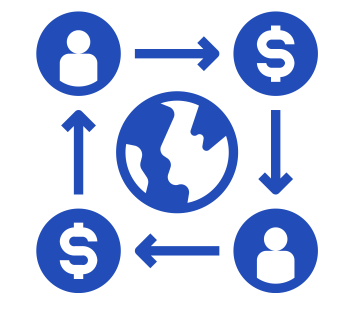

In [10]:
import threading
import queue
import time
import random

q = queue.Queue()

def producer():
    for i in range(5):
        item = f'Item-{i}'
        print(f"Produced {item}")
        q.put(item)
        time.sleep(random.uniform(0.5, 1.5))
        
def consumer():
    for _ in range(5):
        item = q.get( )
        print(f"Consumed {item}")
        time.sleep(random.uniform(0.5, 1.5))
        q.task_done( )

t1 = threading.Thread(target=producer)
t2 = threading.Thread(target=consumer)

t1.start( )
t2.start( )

t1.join( )
t2.join( )

print("Production and Consumption completed.")

Produced Item-0
Consumed Item-0
Produced Item-1
Consumed Item-1
Produced Item-2
Consumed Item-2
Produced Item-3
Consumed Item-3
Produced Item-4
Consumed Item-4
Production and Consumption completed.


Concept:
Inter-thread communication and synchronization using queue.Queue.

Explanation:
The queue safely manages shared resources between threads, ensuring the consumer waits for
items to be produced.








### Summary of Key Concepts:

Basic Thread Creation: Use threading.Thread to run tasks concurrently.

Thread Synchronization: Use Lock to avoid race conditions.

Thread Pooling: Use ThreadPoolExecutor for managing a pool of threads efficiently.

Producer-Consumer Pattern: Use queue.Queue for safe inter-thread communication.

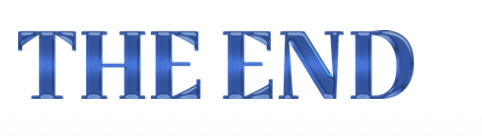